In [6]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style using sns.set_style()
sns.set_style("white")

from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
%matplotlib inline 

In [8]:
ratings_data = pd.read_csv("ratings_small.csv")
ratings_data = ratings_data.drop('timestamp', axis = 1)
ratings_data.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [10]:
movie_names = pd.read_csv("movies_metadata.csv", low_memory=False)
movie_names = movie_names[['title', 'genres']]
movie_names.head()

,title,genres
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]"


In [11]:
movie_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   45460 non-null  object
 1   genres  45466 non-null  object
dtypes: object(2)
memory usage: 710.5+ KB


In [12]:
# movie_data = ratings_data.merge(movie_names, on='movieId')
movie_data = pd.concat([ratings_data, movie_names], axis=1)
movie_data.head()


,userId,movieId,rating,title,genres
0,1,31,2.5,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,1,1029,3.0,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,1,1061,3.0,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,1,1129,2.0,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,1,1172,4.0,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]"


In [13]:
trend = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
trend['total number of ratings'] = pd.DataFrame(movie_data.groupby('title')['rating'].count()) 

trend.head()


,rating,total number of ratings
title,,
!Women Art Revolution,4.5,1
#1 Cheerleader Camp,5.0,1
#Horror,2.5,1
#chicagoGirl,1.0,1
"$1,000 on the Black",4.5,1


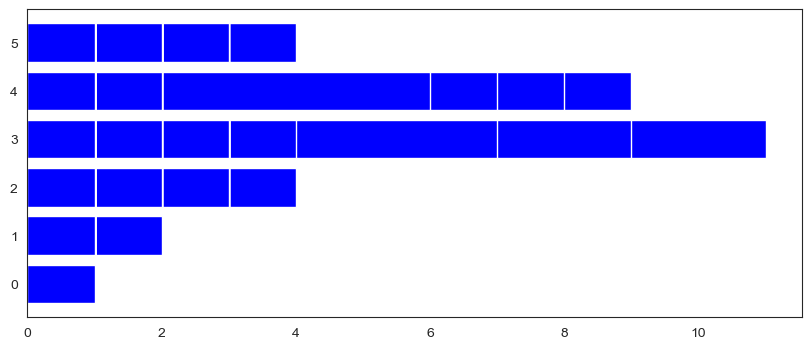

In [15]:
#plot rounded-up ratings with number of movies
plt.figure(figsize =(10, 4))
ax=plt.barh(trend['rating'].round(),trend['total number of ratings'],color='b')
plt.show()

In [16]:
# Calculate mean rating of all movies and check the popular high rating movies
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Rapt                          5.0
My Sister's Kids in Africa    5.0
Nasu: Summer in Andalusia     5.0
Borderline Normal             5.0
Native Land                   5.0
Natsamrat                     5.0
Natural Born Killers          5.0
Natural City                  5.0
Naturally Native              5.0
Nature Calls                  5.0
Name: rating, dtype: float64

In [17]:
movies_users = ratings_data.pivot(index=['userId'], columns=['movieId'], values='rating').fillna(0)
movies_users

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from scipy.sparse import csr_matrix
mat_movies_users=csr_matrix(movies_users.values)
mat_movies_users

<671x9066 sparse matrix of type '<class 'numpy.float64'>'
	with 100004 stored elements in Compressed Sparse Row format>

In [19]:
# Cosine Similarity
model_knn= NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [20]:
model_knn.fit(mat_movies_users)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [21]:
def Recommender(movie_name, data, model, n_recommendations):
    model.fit(data)
    movie_index = process.extractOne(movie_name, movie_names['title'])[2]
    print('Movie Selected: ',movie_names['title'][movie_index], ', Index: ', movie_index)
    print('Searching for recommendations.....')
    distances, indices = model.kneighbors(data[movie_index], n_neighbors=n_recommendations)
    recc_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
    recommend_frame = []
    for val in recc_movie_indices:
#         print(movie_names['title'][val[0]])
        recommend_frame.append({'Title':movie_names['title'][val[0]],'Distance':val[1]})
    
    df = pd.DataFrame(recommend_frame, index = range(1,n_recommendations))
     
    return df

In [22]:
n_recommendations = 20
Recommender('Jumanji', mat_movies_users, model_knn, n_recommendations)

Movie Selected:  Jumanji , Index:  1
Searching for recommendations.....


,Title,Distance
1,Mr. Wonderful,0.523668
2,The Silences of the Palace,0.523338
3,Tarantella,0.522694
4,The Usual Suspects,0.519348
5,Mi Vida Loca,0.516944
6,Antonia's Line,0.505929
7,The Man without a Face,0.473188
8,Boomerang,0.470424
9,Sleepless in Seattle,0.466811
10,Pinocchio,0.462066
